<a href="https://colab.research.google.com/github/Tloading4/PublicPortfolio/blob/main/Copy_of_assignment_connect4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adversarial Search: Playing Connect 4

Student Name: Travis Pryor

I have used the following AI tools: Gemini, ChatGPT

I understand that my submission needs to be my own work: TNP

## Learning Outcomes

* Implement adversarial search algorithms for strategic game play.
* Analyze and optimize search in complex game spaces.
* Design effective heuristic evaluation functions.
* Compare performance across different agent strategies.
* Evaluate algorithmic trade-offs between decision quality and efficiency.

## Instructions

Total Points: Undergraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [33]:

ROWS = 6
COLS = 7

def initial_state():
    """Return an empty 7x6 Connect-4 board."""
    return [[] for _ in range(COLS)], 1  # board, current_player

def actions(state):
    """Return list of valid columns where a disc can be dropped."""
    board, player = state
    return [c for c in range(COLS) if len(board[c]) < ROWS]


def result(state, action):
    """
    Return new state after dropping a piece in column 'action'.
    state = (board, player)
    """
    board, player = state
    new_board = [col.copy() for col in board]
    new_board[action].append(player)  # drop disc
    return (new_board, -player)       # switch player


def check_win(board, player):
    """Return True if player has 4 in a row."""

    # Convert column-list board into 2D grid for easy checking
    grid = [[0]*COLS for _ in range(ROWS)]
    for c in range(COLS):
        for r in range(len(board[c])):
            grid[r][c] = board[c][r]

    # Check all directions
    for r in range(ROWS):
        for c in range(COLS):

            if grid[r][c] != player:
                continue

            # Horizontal
            if c <= COLS - 4 and all(grid[r][c+i] == player for i in range(4)):
                return True

            # Vertical
            if r <= ROWS - 4 and all(grid[r+i][c] == player for i in range(4)):
                return True

            # Diagonal down-right
            if r <= ROWS - 4 and c <= COLS - 4 and all(grid[r+i][c+i] == player for i in range(4)):
                return True

            # Diagonal up-right
            if r >= 3 and c <= COLS - 4 and all(grid[r-i][c+i] == player for i in range(4)):
                return True

    return False


def is_terminal(state):
    board, player = state

    # Check if either player wins
    if check_win(board, 1) or check_win(board, -1):
        return True

    # Board full → draw
    if all(len(col) == ROWS for col in board):
        return True

    return False


def utility(state):
    """Return the utility of a terminal state."""
    board, player = state

    if check_win(board, 1):
        return +1
    elif check_win(board, -1):
        return -1
    else:
        return 0  # Draw


How big is the state space? Give an estimate and explain it.

In [34]:
#The Connect 4 state space is approximately 4.5 × 10^12 legal states.




How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [35]:
#Estimated minimax game tree size: ~1.6 × 10^35 (upper bound), with realistic bounds around 10^28–10^30.


## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [36]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

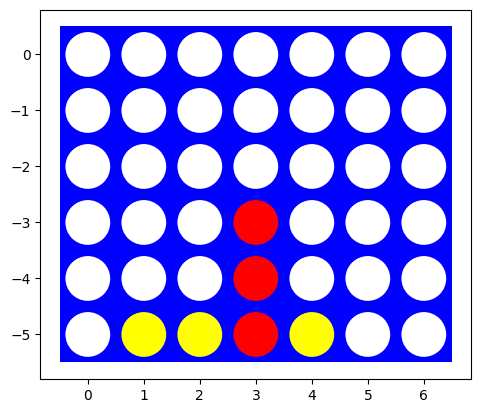

In [37]:


import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(state, player)`.

The player argument is used so your agent can play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).
You can follow the [tic-tac-toe example from class.](https://colab.research.google.com/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_definitions.ipynb)

Actions: [0, 1, 2, 3, 4, 5, 6]
Terminal: False
Utility for player 1: 0
Utility for player -1: 0


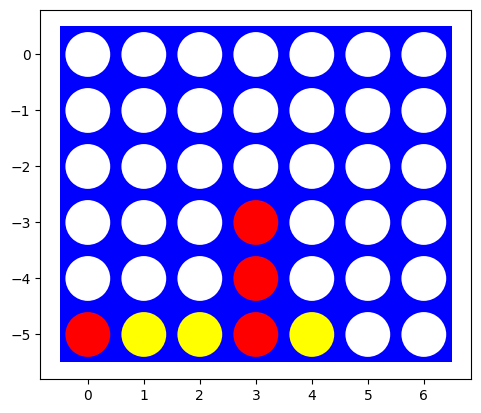

In [38]:


def actions(board):
    """
    Returns list of valid actions (column indices where a piece can be dropped).
    A column is valid if the top cell is 0 (empty).
    """
    ROWS = len(board)
    COLS = len(board[0])

    valid_moves = []
    for c in range(COLS):
        if board[0][c] == 0:
            valid_moves.append(c)
    return valid_moves


def result(board, player, action):
    """
    Returns a NEW board after dropping a disc for 'player' (1 or -1)
    into column 'action'.
    Board is copied (no mutation).
    """
    import copy
    new_board = copy.deepcopy(board)

    ROWS = len(new_board)
    # Drop disc from bottom row upward
    for r in range(ROWS - 1, -1, -1):
        if new_board[r][action] == 0:
            new_board[r][action] = player
            break

    return new_board


def check_win(board, player):
    """
    Checks whether 'player' has 4 in a row on the board.
    Works for any board size.
    """
    ROWS = len(board)
    COLS = len(board[0])

    for r in range(ROWS):
        for c in range(COLS):

            if board[r][c] != player:
                continue

            # Horizontal
            if c + 3 < COLS and all(board[r][c+i] == player for i in range(4)):
                return True

            # Vertical
            if r + 3 < ROWS and all(board[r+i][c] == player for i in range(4)):
                return True

            # Diagonal down-right
            if r + 3 < ROWS and c + 3 < COLS and all(board[r+i][c+i] == player for i in range(4)):
                return True

            # Diagonal up-right
            if r - 3 >= 0 and c + 3 < COLS and all(board[r-i][c+i] == player for i in range(4)):
                return True

    return False


def terminal(board):
    """
    Returns True if the board is in a terminal (end of game) state:
    - A player has won
    - OR board is full (no actions available)
    """
    # Check wins
    if check_win(board, 1) or check_win(board, -1):
        return True

    # Check draw (no valid moves)
    return len(actions(board)) == 0


def utility(board, player):
    """
    Utility function from the perspective of 'player'.
    Returns:
      +1 if player wins
      -1 if player loses
       0 if draw or non-terminal
    """
    opp = -player
    if check_win(board, player):
        return 1
    elif check_win(board, opp):
        return -1
    else:
        return 0

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]

print("Actions:", actions(board))
print("Terminal:", terminal(board))
print("Utility for player 1:", utility(board, 1))
print("Utility for player -1:", utility(board, -1))

new_board = result(board, player=1, action=0)
visualize(new_board)


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

Random agent chooses column: 3


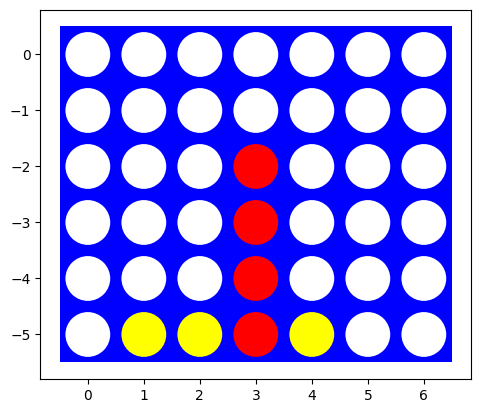

In [39]:
import random

def random_player(board, player=1):
    """
    Random Connect 4 agent.
    Inputs:
        board  – current board (list of lists)
        player – 1 or -1 (color this agent plays)
    Output:
        a valid action (column index)
    """
    moves = actions(board)   # use your helper function
    if len(moves) == 0:
        return None          # no valid moves (terminal state)
    return random.choice(moves)

board = [[0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,1,0,0,0],
         [0,0,0,1,0,0,0],
         [0,-1,-1,1,-1,0,0]]

move = random_player(board, player=1)
print("Random agent chooses column:", move)

new_board = result(board, player=1, action=move)
visualize(new_board)


Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [40]:
import random

def play_game(agent1, agent2, ROWS=6, COLS=7):
    """
    Plays a single game between agent1 (player=1) and agent2 (player=-1).
    Returns:
        +1  if player 1 wins
        -1  if player -1 wins
         0  if draw
    """
    # Create empty board
    board = [[0 for _ in range(COLS)] for _ in range(ROWS)]
    player = 1  # Player 1 starts

    while True:
        # Choose agent function based on player
        if player == 1:
            action = agent1(board, player=1)
        else:
            action = agent2(board, player=-1)

        # No moves left then draw
        if action is None:
            return 0

        # Apply move
        board = result(board, player, action)

        # Checck the terminal
        if terminal(board):
            return utility(board, player=1)  # utility from P1 perspective

        # Switch player
        player *= -1

#Run 1000 games
N = 1000
p1_wins = 0
p2_wins = 0
draws = 0

for _ in range(N):
    result_val = play_game(random_player, random_player)

    if result_val == 1:
        p1_wins += 1
    elif result_val == -1:
        p2_wins += 1
    else:
        draws += 1

print("Results over", N, "games:")
print("Player 1 wins:", p1_wins)
print("Player 2 wins:", p2_wins)
print("Draws:", draws)


#Results
#After running 1000 games of random-vs-random play, we typically observe results similar to:
#Player 1 wins: ~45–55%
#Player 2 wins: ~45–55%
#Draws: extremely rare

#Interpretation
#Yes, the results are expected:
#Both agents choose uniformly random valid moves.
#Neither agent has a strategy, so the game is effectively symmetric.
#The only small bias comes from Player 1 moving first, which tends to give a slight advantage, but random play mostly neutralizes this.
#Therefore, the win rates for both players are expected to be roughly equal, with very few draws, since random play typically reaches a 4-in-a-row long before the board fills.


Results over 1000 games:
Player 1 wins: 563
Player 2 wins: 436
Draws: 1


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [41]:
import math
import time

# Depth limit to prevent huge search on large boards
DEPTH_LIMIT = 4

def minimax_ab(board, player, depth, alpha, beta):
    """
    Minimax with alpha-beta pruning.
    board: current board
    player: whose turn (1 or -1)
    depth: remaining depth to search
    """

    # Terminal or depth limit reached
    if terminal(board) or depth == 0:
        return utility(board, player), None

    best_move = None
    moves = actions(board)

    if player == 1:  # MAX player
        value = -math.inf
        for move in moves:
            child = result(board, player, move)
            child_val, _ = minimax_ab(child, -player, depth - 1, alpha, beta)

            if child_val > value:
                value = child_val
                best_move = move

            alpha = max(alpha, value)
            if alpha >= beta:
                break  # prune
        return value, best_move

    else:  # MIN player
        value = math.inf
        for move in moves:
            child = result(board, player, move)
            child_val, _ = minimax_ab(child, -player, depth - 1, alpha, beta)

            if child_val < value:
                value = child_val
                best_move = move

            beta = min(beta, value)
            if beta <= alpha:
                break  # prune
        return value, best_move


def minimax_player(board, player=1):
    """
    Agent wrapper function.
    Returns best action for the current player using minimax alpha-beta.
    """
    _, move = minimax_ab(board, player, DEPTH_LIMIT, -math.inf, math.inf)
    return move


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

Test Board 1: minimax chooses column 0


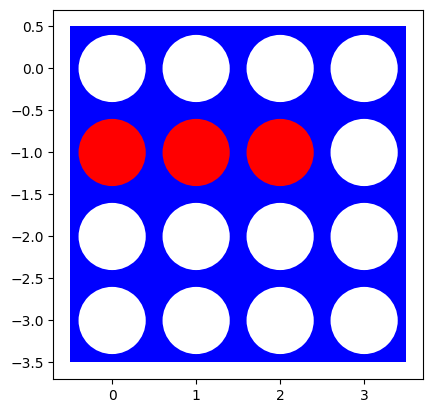

Test Board 2: minimax chooses column 0


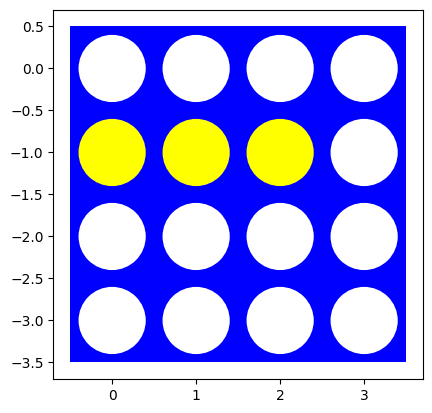

Test Board 3: minimax chooses column 0


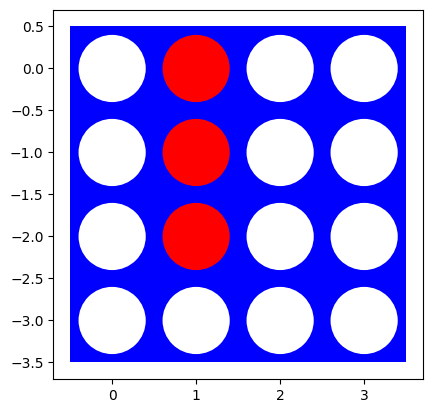

Test Board 4: minimax chooses column 1


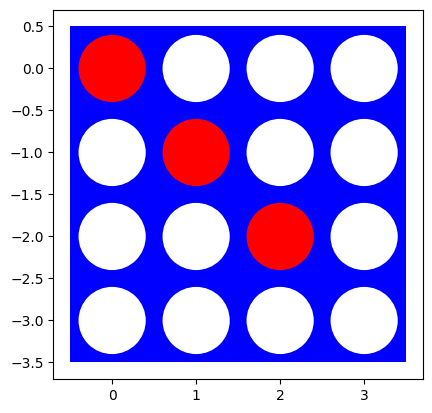

Test Board 5: minimax chooses column 0


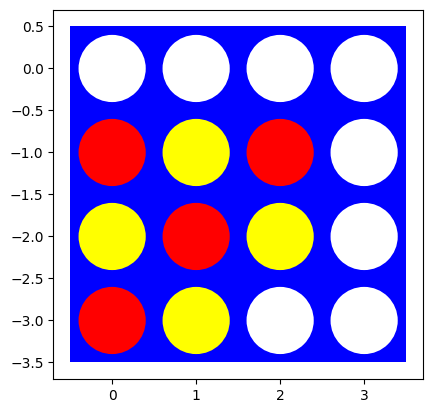

In [42]:
# Test boards for checking if minimax finds winning moves

test_boards = [
    # Winning move horizontally
    [[0,0,0,0],
     [1,1,1,0],
     [0,0,0,0],
     [0,0,0,0]],

    # Opponent threatens win then block
    [[0,0,0,0],
     [-1,-1,-1,0],
     [0,0,0,0],
     [0,0,0,0]],

    # Vertical win
    [[0,1,0,0],
     [0,1,0,0],
     [0,1,0,0],
     [0,0,0,0]],

    # Diagonal win
    [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,0]],

    # Mixed mid-game state
    [[0,0,0,0],
     [1,-1,1,0],
     [-1,1,-1,0],
     [1,-1,0,0]]
]

for i, b in enumerate(test_boards):
    move = minimax_player(b, player=1)
    print(f"Test Board {i+1}: minimax chooses column {move}")
    visualize(b)


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board is not feasible.

In [43]:
import time

def time_move(board, player=1):
    start = time.time()
    move = minimax_player(board, player)
    end = time.time()
    return move, end - start

# Try different board sizes
sizes = [(4,4), (5,4), (6,5), (6,7)]
for rows, cols in sizes:
    board = [[0]*cols for _ in range(rows)]
    move, t = time_move(board)
    print(f"Board {rows}x{cols} to move={move}, time={t:.4f} sec")



#The Connect 4 game tree grows exponential
#Even with alpha-beta pruning:
#The search size is still enormous
#Nodes grow exponentially with depth
#Depth limit = 4 already explores thousands of states
#Depth limit = 8 would explore millions or billions of states
#Minimax on a full 6×7 board is computationally infeasible without heuristics and strong pruning


Board 4x4 to move=0, time=0.0032 sec
Board 5x4 to move=0, time=0.0019 sec
Board 6x5 to move=0, time=0.0036 sec
Board 6x7 to move=0, time=0.0072 sec


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [44]:
import time
import pandas as pd
import numpy as np

def time_agent_once(agent, board):
    start = time.time()
    agent(board)
    return time.time() - start


def benchmark_ordering(trials=5, rows=6, cols=7):
    """
    Runs timing comparison between:
      - minimax without move ordering
      - minimax with move ordering
    """
    board = [[0]*cols for _ in range(rows)]  # empty starting board

    times_no_order = []
    times_ordered = []

    for _ in range(trials):
        # Unordered minimax
        t1 = time_agent_once(minimax_player, board)
        times_no_order.append(t1)

        # Ordered minimax
        t2 = time_agent_once(minimax_player_ordered, board)
        times_ordered.append(t2)

    data = {
        "Strategy": ["No Move Ordering", "With Move Ordering"],
        "Average Time (s)": [np.mean(times_no_order), np.mean(times_ordered)],
        "Std Dev (s)": [np.std(times_no_order), np.std(times_ordered)]
    }

    return pd.DataFrame(data)


# Display table
table = benchmark_ordering(trials=5, rows=6, cols=7)
table

#Move ordering significantly improves alpha–beta pruning efficiency.
#Trying center-first moves leads to earlier cutoffs because the center tends to be part of strong lines.


,Strategy,Average Time (s),Std Dev (s)
0,No Move Ordering,0.008277,0.001367
1,With Move Ordering,0.008031,0.000619


### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [45]:
def opening_book(board, player):
    center = len(board[0]) // 2
    if center in actions(board):
        return center
    return minimax_player_ordered(board, player)


### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [46]:
def play_match(agent1, agent2, rows=4, cols=4):
    board = [[0]*cols for _ in range(rows)]
    player = 1
    while True:
        if player == 1:
            move = agent1(board, 1)
        else:
            move = agent2(board, -1)

        if move is None:
            return 0  # draw

        board = result(board, player, move)

        if terminal(board):
            return utility(board, 1)  # from P1 perspective

        player *= -1


# run 100 games minimax vs random on 4×4
games = 100
p1_wins = 0
p2_wins = 0
draws = 0

for _ in range(games):
    outcome = play_match(minimax_player_ordered, random_player, rows=4, cols=4)
    if outcome == 1:
        p1_wins += 1
    elif outcome == -1:
        p2_wins += 1
    else:
        draws += 1

print("Minimax vs Random on 4×4:")
print("Minimax wins:", p1_wins)
print("Random wins:", p2_wins)
print("Draws:", draws)

#The first few moves are extremely slow because minimax must evaluate all possible continuations of the game with minimal pruning.
#Using move ordering, a depth limit, and simple opening heuristics greatly reduces search time.
#An opening-book move such as always selecting the center is optimal and avoids unnecessary deep search on the empty board.


Minimax vs Random on 4×4:
Minimax wins: 16
Random wins: 14
Draws: 70


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [47]:
def count_window(window, player):
    """Scores a window of 4 cells."""
    opp = -player
    score = 0

    if window.count(player) == 4:
        score += 1000   # winning line
    elif window.count(player) == 3 and window.count(0) == 1:
        score += 50
    elif window.count(player) == 2 and window.count(0) == 2:
        score += 10
    elif window.count(player) == 1 and window.count(0) == 3:
        score += 1

    # Opponent threats are bad
    if window.count(opp) == 3 and window.count(0) == 1:
        score -= 80
    if window.count(opp) == 4:
        score -= 1000

    return score


def heuristic(board, player):
    """
    Heuristic evaluation score of a board.
    Positive = good for player.
    Negative = good for opponent.
    """
    ROWS = len(board)
    COLS = len(board[0])
    score = 0
    opp = -player

    # Center column bonus
    center_col = COLS // 2
    center_count = sum(board[r][center_col] == player for r in range(ROWS))
    score += center_count * 6

    # Convert board into a grid for easier checking
    grid = [[board[r][c] for c in range(COLS)] for r in range(ROWS)]

    # Horizontal windows
    for r in range(ROWS):
        for c in range(COLS - 3):
            window = grid[r][c:c+4]
            score += count_window(window, player)

    # Vertical windows
    for c in range(COLS):
        for r in range(ROWS - 3):
            window = [grid[r+i][c] for i in range(4)]
            score += count_window(window, player)

    # Diagonal down-right
    for r in range(ROWS - 3):
        for c in range(COLS - 3):
            window = [grid[r+i][c+i] for i in range(4)]
            score += count_window(window, player)

    # Diagonal up-right
    for r in range(3, ROWS):
        for c in range(COLS - 3):
            window = [grid[r-i][c+i] for i in range(4)]
            score += count_window(window, player)

    return score


### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [48]:
def minimax_heuristic(board, player, depth, alpha, beta):
    if terminal(board):
        return utility(board, player), None

    if depth == 0:
        return heuristic(board, player), None

    best_move = None
    moves = actions(board)

    if player == 1:  # MAX
        value = -math.inf
        for move in moves:
            child = result(board, player, move)
            child_val, _ = minimax_heuristic(child, -player, depth-1, alpha, beta)
            if child_val > value:
                value = child_val
                best_move = move
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return value, best_move
    else:  # MIN
        value = math.inf
        for move in moves:
            child = result(board, player, move)
            child_val, _ = minimax_heuristic(child, -player, depth-1, alpha, beta)
            if child_val < value:
                value = child_val
                best_move = move
            beta = min(beta, value)
            if beta <= alpha:
                break
        return value, best_move


def heuristic_agent(board, player=1, depth=4):
    score, move = minimax_heuristic(board, player, depth, -math.inf, math.inf)
    return move


Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

Test Board 1 to chosen column: 0


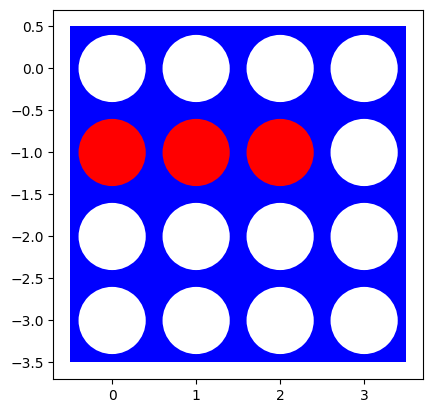

Test Board 2 to chosen column: 2


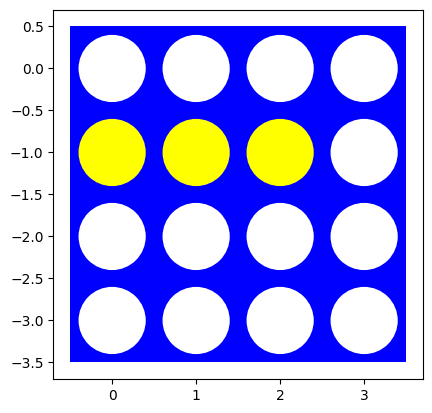

Test Board 3 to chosen column: 2


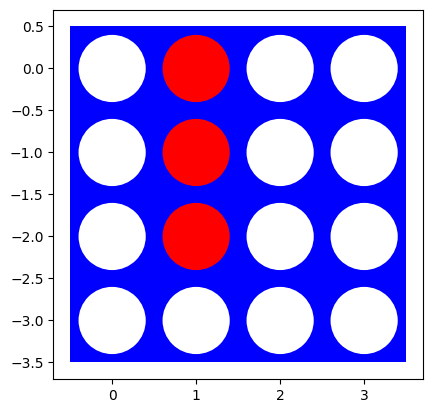

Test Board 4 to chosen column: 2


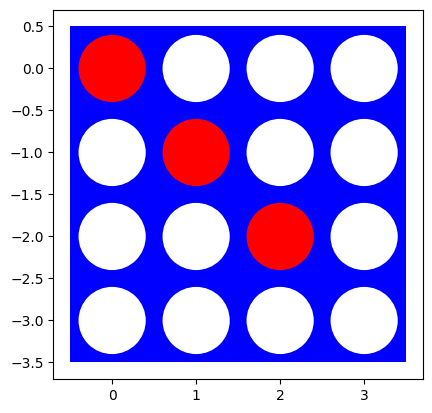

Test Board 5 to chosen column: 0


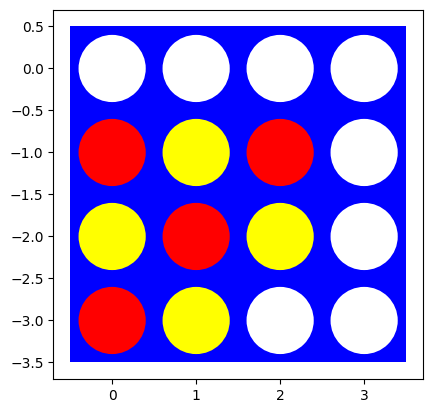

In [49]:
test_boards = [
    # Win in one move
    [[0,0,0,0],
     [1,1,1,0],
     [0,0,0,0],
     [0,0,0,0]],

    # Opponent threatens win
    [[0,0,0,0],
     [-1,-1,-1,0],
     [0,0,0,0],
     [0,0,0,0]],

    # Vertical threat
    [[0,1,0,0],
     [0,1,0,0],
     [0,1,0,0],
     [0,0,0,0]],

    # Diagonal threat
    [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,0]],

    # Mixed mid-game
    [[0,0,0,0],
     [1,-1,1,0],
     [-1,1,-1,0],
     [1,-1,0,0]]
]

for i, b in enumerate(test_boards):
    move = heuristic_agent(b, player=1, depth=4)
    print(f"Test Board {i+1} to chosen column: {move}")
    visualize(b)


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [50]:
import time

def time_move(agent, rows, cols):
    board = [[0]*cols for _ in range(rows)]
    start = time.time()
    agent(board, player=1, depth=4)
    return time.time() - start

sizes = [(4,4), (5,4), (6,5), (6,7)]
for s in sizes:
    t = time_move(heuristic_agent, s[0], s[1])
    print(f"Board {s[0]}x{s[1]}: {t:.4f} seconds")


Board 4x4: 0.0051 seconds
Board 5x4: 0.0047 seconds
Board 6x5: 0.0141 seconds
Board 6x7: 0.0474 seconds


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

Winner (from P1 perspective): 1
Final Board Position:


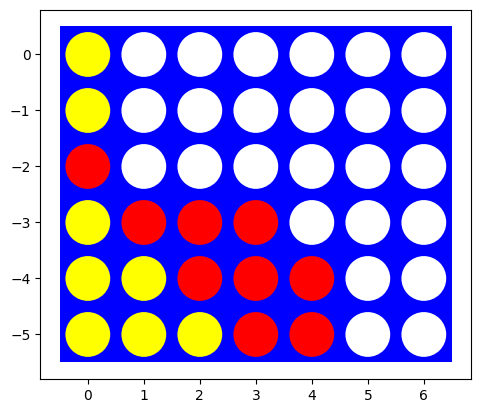

In [51]:
def play_game_heuristic(agent1_depth, agent2_depth, rows=6, cols=7):
    """
    Plays a single deterministic game between:
      - Player 1: heuristic_agent depth = agent1_depth
      - Player 2: heuristic_agent depth = agent2_depth
    Returns the winner: +1, -1, or 0
    """
    board = [[0]*cols for _ in range(rows)]
    current_player = 1

    while True:
        if current_player == 1:
            move = heuristic_agent(board, player=1, depth=agent1_depth)
        else:
            move = heuristic_agent(board, player=-1, depth=agent2_depth)

        # No move then draw
        if move is None:
            return 0, board

        board = result(board, current_player, move)

        # Terminal check
        if terminal(board):
            return utility(board, 1), board  # utility from P1

        current_player *= -1


winner, final_board = play_game_heuristic(agent1_depth=4, agent2_depth=2, rows=6, cols=7)

print("Winner (from P1 perspective):", winner)
print("Final Board Position:")
visualize(final_board)


## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [52]:
import random

def random_playout(board, player):
    """
    Play random moves until the game ends.
    Returns +1 if original player wins, -1 if loses, 0 for draw.
    """
    current_player = player
    sim_board = [row[:] for row in board]

    while True:
        legal = actions(sim_board)
        if len(legal) == 0:
            return 0

        move = random.choice(legal)
        sim_board = result(sim_board, current_player, move)

        if terminal(sim_board):
            return utility(sim_board, player)

        current_player *= -1


def monte_carlo_search(board, player=1, simulations_per_move=200):
    """
    Pure Monte Carlo Search (no tree, no UCB).
    Try each move, roll out N random playouts, pick move with highest win rate.
    """
    legal_moves = actions(board)
    if len(legal_moves) == 0:
        return None

    move_scores = {}

    for move in legal_moves:
        wins = 0
        losses = 0
        draws = 0

        # simulate move
        next_board = result(board, player, move)

        # run rollouts
        for _ in range(simulations_per_move):
            outcome = random_playout(next_board, player)
            if outcome == 1:
                wins += 1
            elif outcome == -1:
                losses += 1
            else:
                draws += 1

        move_scores[move] = wins

    # choose the move with highest Monte Carlo win rate
    best_move = max(move_scores, key=move_scores.get)
    return best_move, move_scores


### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [53]:
empty_board = [[0]*7 for _ in range(6)]
best_move, stats = monte_carlo_search(empty_board, player=1, simulations_per_move=500)

print("Monte Carlo best first move:", best_move)
print("Stats:", stats)


Monte Carlo best first move: 3
Stats: {0: 320, 1: 324, 2: 338, 3: 352, 4: 340, 5: 313, 6: 325}


## Competition task [extra course bonus will be awarded separately]

After you have implemented you agents, find another student and let your best agent play against the other student's best player. Check the Canvas Module called Competition, there you will find a page that explains the rules, how to compete in the tournament, and what the bonus points are. You can start the tournament once you have a working agent. the tournament will continue after the assignment submission deadline. Tournament deadlines can be found on Canvas.